# Stern-Gerlach Experiments
*****
## Example 1.1:
A measurement of $S_z$ is carried out on a particle in the state: $|\psi\rangle=\frac{1}{2}|+z\rangle+\frac{\sqrt{3i}}{2}|-z\rangle$. What are the possible results of this measurement and with what probability do these results occur?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [2]:
posZ = basis(2,0)
negZ = basis(2,1)
psi = 1/2*posZ + np.sqrt(3)*1j/2*negZ
psi

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5+0.j       ]
 [0. +0.8660254j]]

In [3]:
mag1 = (negZ.dag()*psi).norm() ** 2 #probability of measuring psi in the positve z-axis direction
mag2 = (psi.dag()*posZ).norm() ** 2 #same but negative z-axis
print('The probability of measuring psi in the positive Z-direction is '+str(mag1)+', while measuring psi in the negative Z-direction is '+str(mag2)+'.')

The probability of measuring psi in the positive Z-direction is 0.7499999999999999, while measuring psi in the negative Z-direction is 0.25.


## Example 1.2:
For the same particle in Example 1.1, what is the expectation value $\langle S_z\rangle$ and the uncertaintly $\Delta S_z$ for this state?

We will assume that $\hbar$ has a value of 1 in this:

In [4]:
ExpSz = (posZ.dag()*psi).norm() ** 2 * 1/2 + (negZ.dag()*psi).norm() ** 2 *-1/2
ExpSz

-0.24999999999999994

The expectation value is $-0.25\hbar$.

In [7]:
ExpSz2 = (posZ.dag()*psi).norm() ** 2 * (1/2)**2 + (negZ.dag()*psi).norm() ** 2 *(-1/2)**2
DeltaSz=(ExpSz2-ExpSz**2)**.5
DeltaSz

0.4330127018922193

The uncertainty in this measurement is $0.433\hbar$.

## Example 1.3:
For the same particle, what is the probability that a measurment of $S_y$ is in the positive direction? What is $S_y$ for this state?

In [8]:
posY = 1/np.sqrt(2)*posZ+1j/np.sqrt(2)*negZ
negY = 1/np.sqrt(2)*posZ-1j/np.sqrt(2)*negZ
Sy = (posY.dag()*psi).norm()**2

The probability of the measurement is $0.93$.

In [9]:
DeltaSy = Sy*1/2 + (1-Sy)*-1/2
np.sqrt(3)/4

0.4330127018922193

Therefore, the expecation value $\langle S_y\rangle$ = $0.433\hbar$.

## Question 1.8:
The state of a $\textrm{spin}-\frac{1}{2}$ particle is given by $|\psi_1\rangle=\frac{i}{\sqrt{3}}|+z\rangle+\sqrt{\frac{2}{3}}|-z\rangle$. What are $\langle S_z\rangle$ and $\Delta S_z$ for this state? Again, assume $\hbar$ is $1$.

In [10]:
psi1 = 1j/np.sqrt(3)*posZ+np.sqrt(2/3)*negZ
psi1

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.        +0.57735027j]
 [0.81649658+0.j        ]]

In [11]:
ExpSz = (posZ.dag()*psi1).norm()**2*1/2+(negZ.dag()*psi1).norm()**2*-1/2
ExpSz

-0.1666666666666666

In [12]:
ExpSz2 = (posZ.dag()*psi1).norm()**2*(1/2)**2+(negZ.dag()*psi1).norm()**2*(-1/2)**2
DeltaSz = (ExpSz2-ExpSz**2)**.5
DeltaSz

0.4714045207910317

In [ ]:
from random import choices
import matplotlib as mpl

In [56]:
spin = [0.5, -0.5]
def spinMeasure(psi, number=1):
    spin = [0.5, -0.5]
    probability = [(posZ.dag()*psi).norm()**2,(negZ.dag()*psi).norm()**2]
    data = []
    avVal = 0
    for i in range(number):
        data.append(choices(spin, probability))
    for i in range(number):
        avVal += data[i][0]
    avVal = avVal/number
    return('The average value after simulating '+str(number)+' measurments is '+str(avVal)+'.')

spinMeasure(psi1,10000)

'The average value after simulating 10000 measurments is -0.1706.'

## Question 1.9:
Verify that $\Delta S_x = \sqrt{\langle S_x^2\rangle-\langle S_x\rangle^2}=0$ for the state $|+x\rangle$.

In [76]:
posX = 1/np.sqrt(2)*posZ+1/np.sqrt(2)*negZ
negX = 1/np.sqrt(2)*posZ-1/np.sqrt(2)*negZ
posX

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [83]:
ExpSx  = (posX.dag()*posX).norm()**2*1/2+(negX.dag()*posX).norm()**2*-1/2
ExpSx2 = (posX.dag()*posX).norm()**2*(1/2)**2+(negX.dag()*posX).norm()**2*(-1/2)**2
DeltaSx = np.sqrt(ExpSx2-ExpSx**2)
DeltaSx

1.0536712127723509e-08

## Question 1.11:
Calculate $\langle S_x\rangle$, $\langle S_y\rangle$, and $\langle S_z\rangle$ for the state $|\psi_2\rangle=-\frac{i}{2}|+z\rangle+\frac{\sqrt{3}}{2}|-z\rangle$.

In [99]:
psi2 = -1j/2*posZ+np.sqrt(3)/2*negZ
def expectation(state,basis):
    if basis == 'x':
        return((posX.dag()*state).norm()**2*1/2+(negX.dag()*state).norm()**2*-1/2)
    if basis == 'y':
        return((posY.dag()*state).norm()**2*1/2+(negY.dag()*state).norm()**2*-1/2)
    if basis == 'z':
        return((posZ.dag()*state).norm()**2*1/2+(negZ.dag()*state).norm()**2*-1/2)

Sx = expectation(psi2,'x')
Sy = expectation(psi2,'y')
Sz = expectation(psi2,'z')
print('The expectations values are Sx='+str(Sx)+', Sy='+str(Sy)+', and Sz='+str(Sz)+'.')

The expectations values are Sx=0.0, Sy=0.43301270189221924, and Sz=-0.24999999999999994.


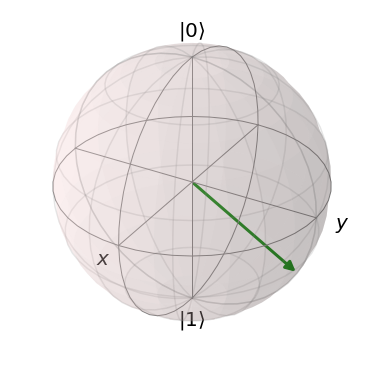

In [94]:
b = Bloch()
b.add_states(psi2)
b.show()